# K-Means and K-Medoids Clustering with Python

- **Unsupervised learning** means that there is no outcome to be predicted, and the algorithm only tries to find patterns in the data  


- **K-Means Clustering** is an unsupervised learning algorithm that tries to cluster data based on their similarity  
    - It is needed to specify the number of clusters wanted for the data to be grouped into
    - The algorithm randomly assigns each observation to a cluster and finds the centroid of each cluster
    - Then, the algorithm iterates through two steps:
        - Reassigns data points to the cluster whose centroid is the closest
        - Calculates the new centroid of each cluster  
    - These two steps are repeated until the within-cluster variation cannot be reduced any further  
    - The within-cluster variation is calculated as the sum of the Euclidean distance between the data points and their respective cluster centroids   


- **K-Medoids Clustering** is an unsupervised learning algorithm that tries to minimize the distance between points labelled to be in a cluster and a point designated as the centre of that cluster
    - It is a classical partitioning technique of clustering that splits the data set of <em>n</em> objects into <em>k</em> clusters, where the number <em>k</em> of clusters assumed is known <em>a priori</em>
    - K-Medoids chooses actual data points as centres (<em>medoids</em> or <em>exemplars</em>) and, thereby, allows for greater interpretability of the cluster centres than in K-Means
    - This algorithm can be used with arbitrary dissimilarity measures, whereas K-Means generally requires Euclidean distance for efficient solutions
    - Because K-Medoids minimizes a sum of pairwise dissimilarities instead of a sum of squared Euclidean distances, it is more robust to noise and outliers than K-Means
    - The medoid of a cluster is defined as the object in the cluster whose average dissimilarity to all the objects in the cluster is minimal - the most centrally located point in the cluster

## Import libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/goncalo/.local/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Create the data

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=200,n_features= 2, centers= 4, cluster_std=1.8, random_state=2022)

In [4]:
X = data[0]
y = data[1]

View the first 5 lines of the data set:

In [5]:
print('X: ',X[0:5,:])
print('y: ',y[0:5])

X:  [[  5.88508997   2.9021639 ]
 [ -8.20429992 -11.68670283]
 [  1.9125188   -2.76746603]
 [ -9.39601207  -7.2830252 ]
 [  6.1986976    7.32152342]]
y:  [2 1 2 1 3]


## Visualize the data

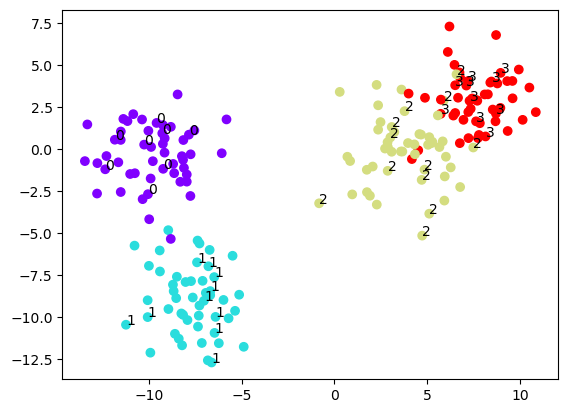

In [7]:
plt.scatter(X[:,0],X[:,1],c = y,cmap='rainbow')
for i,txt in enumerate(y):
    if i%5 == 0: 
        plt.annotate(txt,(X[i,0],X[i,1]))

## Create the clusters

#### With K-Means

In [8]:
from sklearn.cluster import KMeans

In [9]:
kmeans = KMeans(n_clusters= 4 , n_init = 10, random_state=2022)

In [10]:
kmeans.fit(X)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f94e4cbdd80>
Traceback (most recent call last):
  File "/home/goncalo/miniconda3/envs/daa310/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/goncalo/miniconda3/envs/daa310/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/goncalo/miniconda3/envs/daa310/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/goncalo/miniconda3/envs/daa310/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Th

KMeans(n_clusters=4, n_init=10, random_state=2022)

In [12]:
kmeans.cluster_centers_

array([[-7.68797564, -8.88054369],
       [ 7.70499062,  2.96975295],
       [-9.78544862, -0.2509739 ],
       [ 3.60428123, -0.21752545]])

In [13]:
kmeans.labels_

array([1, 0, 3, 0, 1, 2, 0, 2, 3, 3, 1, 1, 3, 1, 2, 1, 1, 1, 1, 2, 0, 3,
       1, 1, 0, 0, 3, 0, 3, 3, 1, 0, 1, 3, 1, 3, 0, 1, 0, 2, 1, 2, 1, 3,
       3, 3, 0, 0, 3, 0, 0, 3, 1, 1, 0, 3, 1, 3, 1, 2, 2, 2, 3, 3, 1, 2,
       0, 2, 2, 2, 3, 2, 3, 0, 0, 2, 2, 0, 0, 2, 1, 1, 2, 3, 0, 0, 1, 3,
       2, 0, 3, 1, 2, 3, 3, 1, 3, 2, 3, 3, 0, 1, 2, 0, 2, 3, 2, 3, 2, 2,
       1, 2, 2, 2, 3, 2, 3, 3, 0, 3, 1, 1, 1, 3, 0, 0, 1, 3, 2, 1, 0, 2,
       2, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 3, 0, 1, 0, 2, 3, 2, 3, 3, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 3, 1, 2, 0, 0, 1, 2, 3, 1, 1, 0, 3, 1,
       3, 0, 0, 2, 3, 0, 2, 2, 0, 2, 1, 1, 2, 3, 2, 3, 3, 0, 2, 1, 2, 0,
       2, 2], dtype=int32)

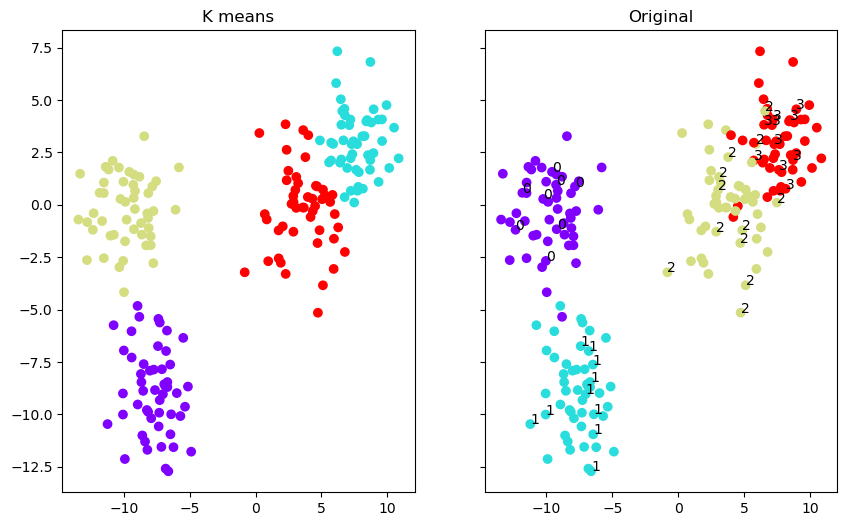

In [15]:
f,(ax1,ax2) = plt.subplots(1,2,sharey= True, figsize=(10,6))
ax1.set_title('K means')
ax1.scatter(X[:,0], X[:,1], c = kmeans.labels_,cmap = 'rainbow')
ax2.set_title('Original')
ax2.scatter(X[:,0], X[:,1], c = y,cmap = 'rainbow')
for i, txt in enumerate(y):
    if i%5 == 0:
        plt.annotate(txt,(X[i,0],X[i,1]))

You should note that the colors are meaningless when in reference to the two plots.

##### Align K-Means prediction class with real values

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

In [18]:
y_pred = kmeans.predict(X)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f94dd457760>
Traceback (most recent call last):
  File "/home/goncalo/miniconda3/envs/daa310/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/goncalo/miniconda3/envs/daa310/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/goncalo/miniconda3/envs/daa310/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/goncalo/miniconda3/envs/daa310/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


In [19]:
y_pred

array([1, 0, 3, 0, 1, 2, 0, 2, 3, 3, 1, 1, 3, 1, 2, 1, 1, 1, 1, 2, 0, 3,
       1, 1, 0, 0, 3, 0, 3, 3, 1, 0, 1, 3, 1, 3, 0, 1, 0, 2, 1, 2, 1, 3,
       3, 3, 0, 0, 3, 0, 0, 3, 1, 1, 0, 3, 1, 3, 1, 2, 2, 2, 3, 3, 1, 2,
       0, 2, 2, 2, 3, 2, 3, 0, 0, 2, 2, 0, 0, 2, 1, 1, 2, 3, 0, 0, 1, 3,
       2, 0, 3, 1, 2, 3, 3, 1, 3, 2, 3, 3, 0, 1, 2, 0, 2, 3, 2, 3, 2, 2,
       1, 2, 2, 2, 3, 2, 3, 3, 0, 3, 1, 1, 1, 3, 0, 0, 1, 3, 2, 1, 0, 2,
       2, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 3, 0, 1, 0, 2, 3, 2, 3, 3, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 3, 1, 2, 0, 0, 1, 2, 3, 1, 1, 0, 3, 1,
       3, 0, 0, 2, 3, 0, 2, 2, 0, 2, 1, 1, 2, 3, 2, 3, 3, 0, 2, 1, 2, 0,
       2, 2], dtype=int32)

In [20]:
y

array([2, 1, 2, 1, 3, 0, 1, 0, 2, 2, 3, 3, 2, 3, 0, 3, 3, 3, 3, 0, 1, 2,
       3, 3, 1, 1, 3, 1, 2, 2, 3, 1, 3, 3, 3, 2, 1, 3, 1, 0, 3, 0, 3, 2,
       2, 2, 1, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 2, 3, 0, 0, 0, 2, 2, 3, 0,
       1, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 0, 2, 3, 0, 2, 1, 1, 3, 2,
       0, 1, 2, 3, 0, 2, 2, 3, 2, 0, 2, 2, 1, 3, 0, 1, 0, 2, 0, 2, 0, 0,
       3, 0, 0, 0, 2, 0, 2, 2, 1, 2, 3, 3, 3, 2, 1, 1, 3, 2, 0, 3, 1, 0,
       0, 1, 1, 1, 0, 0, 3, 1, 1, 1, 3, 2, 1, 3, 1, 0, 2, 0, 2, 2, 3, 3,
       2, 3, 3, 3, 0, 1, 1, 1, 1, 2, 3, 0, 1, 1, 3, 0, 2, 3, 3, 1, 2, 3,
       2, 1, 1, 0, 2, 1, 0, 0, 1, 0, 3, 3, 0, 2, 0, 3, 2, 1, 0, 2, 0, 1,
       0, 0])

In [21]:
y_pred = np.where(y_pred == 0, 10, y_pred)

In [22]:
y_pred = np.where(y_pred == 2, 0, y_pred)

In [23]:
y_pred = np.where(y_pred == 3, 2, y_pred)

In [24]:
y_pred = np.where(y_pred == 1, 3, y_pred)

[3 1 2 1 3 0 1 0 2 2 3 3 2 3 0 3 3 3 3 0 1 2 3 3 1 1 2 1 2 2 3 1 3 2 3 2 1
 3 1 0 3 0 3 2 2 2 1 1 2 1 1 2 3 3 1 2 3 2 3 0 0 0 2 2 3 0 1 0 0 0 2 0 2 1
 1 0 0 1 1 0 3 3 0 2 1 1 3 2 0 1 2 3 0 2 2 3 2 0 2 2 1 3 0 1 0 2 0 2 0 0 3
 0 0 0 2 0 2 2 1 2 3 3 3 2 1 1 3 2 0 3 1 0 0 1 1 1 0 0 3 1 1 1 3 2 1 3 1 0
 2 0 2 2 3 3 3 3 3 3 1 1 1 1 1 2 3 0 1 1 3 0 2 3 3 1 2 3 2 1 1 0 2 1 0 0 1
 0 3 3 0 2 0 2 2 1 0 3 0 1 0 0]
[[49  1  0  0]
 [ 0 50  0  0]
 [ 0  0 46  4]
 [ 0  0  3 47]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.98      1.00      0.99        50
           2       0.94      0.92      0.93        50
           3       0.92      0.94      0.93        50

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



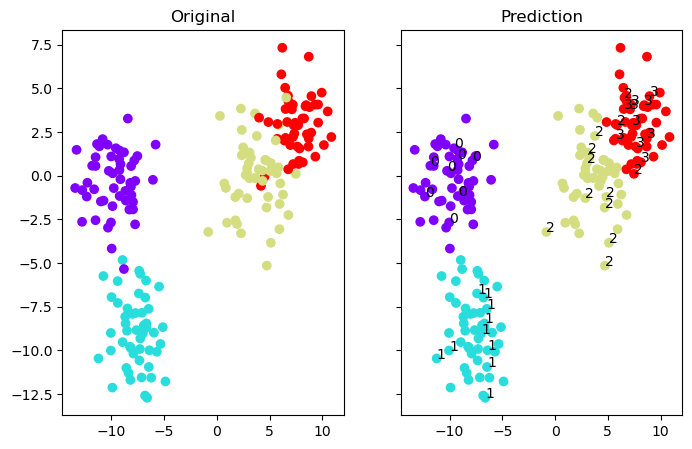

In [29]:
y_pred = np.where(y_pred == 10, 1, y_pred)
print(y_pred)
f,(ax1,ax2) = plt.subplots(1,2,sharey= True, figsize=(8,5))
ax1.set_title('Original')
ax1.scatter(X[:,0], X[:,1], c = y,cmap = 'rainbow')
ax2.set_title('Prediction')
ax2.scatter(X[:,0], X[:,1], c = y_pred,cmap = 'rainbow')
for i, txt in enumerate(y):
    if i%5 == 0:
        plt.annotate(txt,(X[i,0],X[i,1]))
plt.savefig("KMeans_pred.png")
print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))

#### With K-Medoids

In [30]:
%pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 552.5 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [31]:
from sklearn_extra.cluster import KMedoids

In [32]:
Kmedoids = KMedoids(n_clusters=4,random_state=2022)
Kmedoids.fit(X)

KMedoids(n_clusters=4, random_state=2022)

In [34]:
Kmedoids.cluster_centers_

array([[-7.62795904, -8.8354951 ],
       [-9.87312876,  0.13931247],
       [ 3.65994783, -0.13260646],
       [ 7.66163195,  2.9333056 ]])

In [35]:
Kmedoids.labels_

array([3, 0, 2, 0, 3, 1, 0, 1, 2, 2, 3, 3, 2, 3, 1, 3, 3, 3, 3, 1, 0, 2,
       3, 3, 0, 0, 2, 0, 2, 2, 3, 0, 3, 2, 3, 2, 0, 3, 0, 1, 3, 1, 3, 2,
       2, 2, 0, 0, 2, 0, 0, 2, 3, 3, 0, 2, 3, 2, 3, 1, 1, 1, 2, 2, 3, 1,
       0, 1, 1, 1, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 3, 3, 1, 2, 0, 0, 3, 2,
       1, 0, 2, 3, 1, 2, 2, 3, 2, 1, 2, 2, 0, 3, 1, 0, 1, 2, 1, 2, 1, 1,
       3, 1, 1, 1, 2, 1, 2, 2, 0, 2, 3, 3, 3, 2, 0, 0, 3, 2, 1, 3, 0, 1,
       1, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 0, 3, 0, 1, 2, 1, 2, 2, 3, 3,
       3, 3, 3, 3, 0, 0, 0, 0, 0, 2, 3, 1, 0, 0, 3, 1, 2, 3, 3, 0, 2, 3,
       2, 0, 0, 1, 2, 0, 1, 1, 0, 1, 3, 3, 1, 2, 1, 2, 2, 0, 1, 3, 1, 0,
       1, 1])

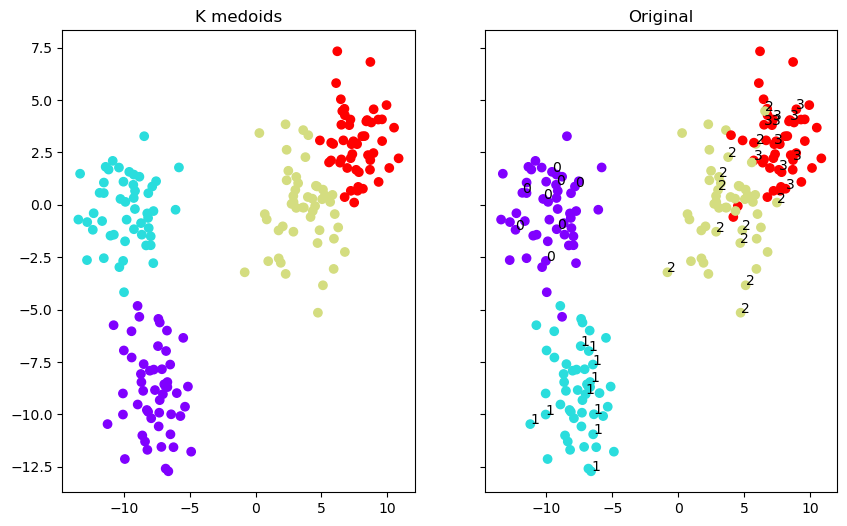

In [36]:
f,(ax1,ax2) = plt.subplots(1,2,sharey= True, figsize=(10,6))
ax1.set_title('K medoids')
ax1.scatter(X[:,0], X[:,1], c = Kmedoids.labels_,cmap = 'rainbow')
ax2.set_title('Original')
ax2.scatter(X[:,0], X[:,1], c = y,cmap = 'rainbow')
for i, txt in enumerate(y):
    if i%5 == 0:
        plt.annotate(txt,(X[i,0],X[i,1]))
plt.savefig("Kmedoids.png")

##### Align K-Medoids prediction class with real values

In [37]:
y_pred = Kmedoids.predict(X)
y_pred

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f94dc4b71c0>
Traceback (most recent call last):
  File "/home/goncalo/miniconda3/envs/daa310/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/goncalo/miniconda3/envs/daa310/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/goncalo/miniconda3/envs/daa310/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/goncalo/miniconda3/envs/daa310/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


array([3, 0, 2, 0, 3, 1, 0, 1, 2, 2, 3, 3, 2, 3, 1, 3, 3, 3, 3, 1, 0, 2,
       3, 3, 0, 0, 2, 0, 2, 2, 3, 0, 3, 2, 3, 2, 0, 3, 0, 1, 3, 1, 3, 2,
       2, 2, 0, 0, 2, 0, 0, 2, 3, 3, 0, 2, 3, 2, 3, 1, 1, 1, 2, 2, 3, 1,
       0, 1, 1, 1, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 3, 3, 1, 2, 0, 0, 3, 2,
       1, 0, 2, 3, 1, 2, 2, 3, 2, 1, 2, 2, 0, 3, 1, 0, 1, 2, 1, 2, 1, 1,
       3, 1, 1, 1, 2, 1, 2, 2, 0, 2, 3, 3, 3, 2, 0, 0, 3, 2, 1, 3, 0, 1,
       1, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 0, 3, 0, 1, 2, 1, 2, 2, 3, 3,
       3, 3, 3, 3, 0, 0, 0, 0, 0, 2, 3, 1, 0, 0, 3, 1, 2, 3, 3, 0, 2, 3,
       2, 0, 0, 1, 2, 0, 1, 1, 0, 1, 3, 3, 1, 2, 1, 2, 2, 0, 1, 3, 1, 0,
       1, 1])

In [38]:
y

array([2, 1, 2, 1, 3, 0, 1, 0, 2, 2, 3, 3, 2, 3, 0, 3, 3, 3, 3, 0, 1, 2,
       3, 3, 1, 1, 3, 1, 2, 2, 3, 1, 3, 3, 3, 2, 1, 3, 1, 0, 3, 0, 3, 2,
       2, 2, 1, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 2, 3, 0, 0, 0, 2, 2, 3, 0,
       1, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 0, 2, 3, 0, 2, 1, 1, 3, 2,
       0, 1, 2, 3, 0, 2, 2, 3, 2, 0, 2, 2, 1, 3, 0, 1, 0, 2, 0, 2, 0, 0,
       3, 0, 0, 0, 2, 0, 2, 2, 1, 2, 3, 3, 3, 2, 1, 1, 3, 2, 0, 3, 1, 0,
       0, 1, 1, 1, 0, 0, 3, 1, 1, 1, 3, 2, 1, 3, 1, 0, 2, 0, 2, 2, 3, 3,
       2, 3, 3, 3, 0, 1, 1, 1, 1, 2, 3, 0, 1, 1, 3, 0, 2, 3, 3, 1, 2, 3,
       2, 1, 1, 0, 2, 1, 0, 0, 1, 0, 3, 3, 0, 2, 0, 3, 2, 1, 0, 2, 0, 1,
       0, 0])

In [40]:
y_pred = np.where(y_pred == 1, 10, y_pred)
y_pred = np.where(y_pred == 0, 1, y_pred)
y_pred = np.where(y_pred == 10, 0, y_pred)

In [41]:
y_pred 

array([3, 1, 2, 1, 3, 0, 1, 0, 2, 2, 3, 3, 2, 3, 0, 3, 3, 3, 3, 0, 1, 2,
       3, 3, 1, 1, 2, 1, 2, 2, 3, 1, 3, 2, 3, 2, 1, 3, 1, 0, 3, 0, 3, 2,
       2, 2, 1, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 2, 3, 0, 0, 0, 2, 2, 3, 0,
       1, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 0, 3, 3, 0, 2, 1, 1, 3, 2,
       0, 1, 2, 3, 0, 2, 2, 3, 2, 0, 2, 2, 1, 3, 0, 1, 0, 2, 0, 2, 0, 0,
       3, 0, 0, 0, 2, 0, 2, 2, 1, 2, 3, 3, 3, 2, 1, 1, 3, 2, 0, 3, 1, 0,
       0, 1, 1, 1, 0, 0, 3, 1, 1, 1, 3, 2, 1, 3, 1, 0, 2, 0, 2, 2, 3, 3,
       3, 3, 3, 3, 1, 1, 1, 1, 1, 2, 3, 0, 1, 1, 3, 0, 2, 3, 3, 1, 2, 3,
       2, 1, 1, 0, 2, 1, 0, 0, 1, 0, 3, 3, 0, 2, 0, 2, 2, 1, 0, 3, 0, 1,
       0, 0])

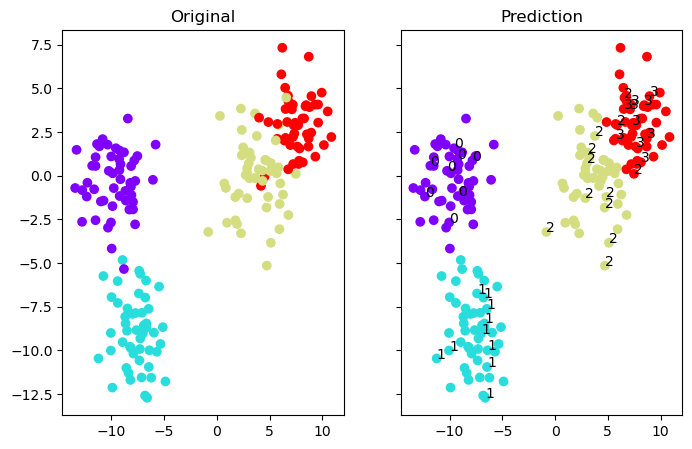

In [42]:
f,(ax1,ax2) = plt.subplots(1,2,sharey= True, figsize=(8,5))
ax1.set_title('Original')
ax1.scatter(X[:,0], X[:,1], c = y,cmap = 'rainbow')
ax2.set_title('Prediction')
ax2.scatter(X[:,0], X[:,1], c = y_pred,cmap = 'rainbow')
for i, txt in enumerate(y):
    if i%5 == 0:
        plt.annotate(txt,(X[i,0],X[i,1]))
plt.savefig("KMedoids_pred.png")


In [43]:
print(confusion_matrix(y,y_pred))

[[49  1  0  0]
 [ 0 50  0  0]
 [ 0  0 46  4]
 [ 0  0  3 47]]


In [44]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.98      1.00      0.99        50
           2       0.94      0.92      0.93        50
           3       0.92      0.94      0.93        50

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

